In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [6]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [8]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [9]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [10]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [13]:
X_train.isnull().mean() * 100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [14]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [16]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [19]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
8,27.0,11.1333,2,27.000000,27.0,11.1333,11.1333
189,36.0,7.8958,0,36.000000,36.0,7.8958,7.8958
74,32.0,56.4958,0,32.000000,32.0,56.4958,56.4958
277,NaN,0.0000,0,29.498846,28.0,0.0000,0.0000
502,NaN,7.6292,0,29.498846,28.0,7.6292,7.6292


In [22]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('\n________________________________________\n')

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477438
Age Variance after median imputation:  169.20731007048096
Age Variance after mean imputation:  168.8519336687225

________________________________________

Original Fare variable variance:  2761.031434948639
Fare Variance after median imputation:  2637.01248167777
Fare Variance after mean imputation:  2621.2323749512393


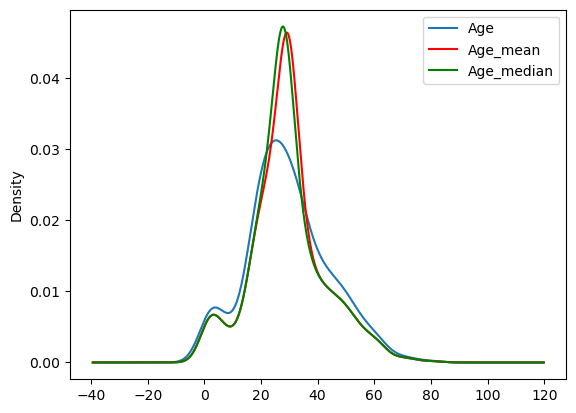

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)


# original variable distribution
X_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with mean
X_train['Age_mean'].plot(kind='kde',ax=ax,color='red')

# variable imputed with median
X_train['Age_median'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

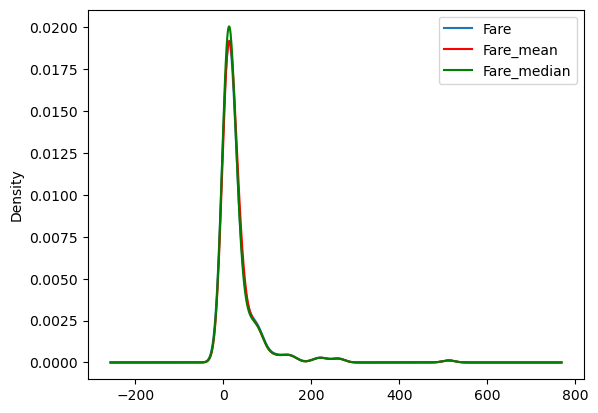

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)


# original variable distribution
X_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with mean
X_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')

# variable imputed with median
X_train['Fare_median'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [26]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [27]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

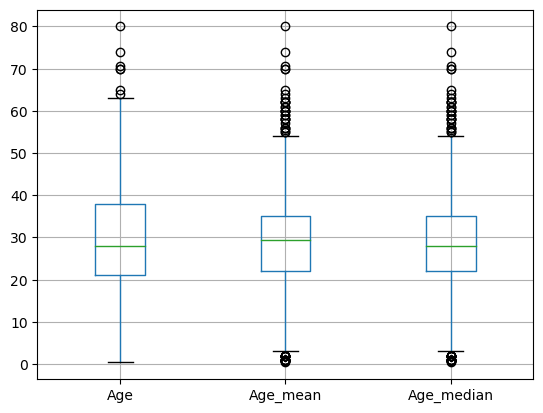

In [28]:
# show us the outliers

X_train[['Age','Age_mean','Age_median']].boxplot()

<Axes: >

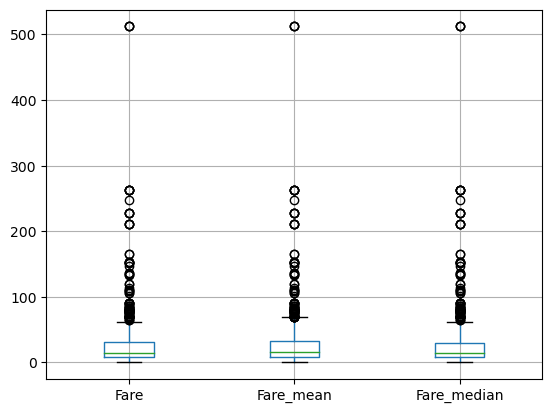

In [29]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using Sklearn


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Fare']),
    ('imputer2',imputer2,['Age'])
],remainder='passthrough')